In [26]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
import matplotlib.pyplot as plt

# TODO: Optimize neural network hyperparameters using RandomizedSearch
params = dict(
    hidden_layer_sizes= [(1,),(50,), (9,9,9)], 
    activation= ["tanh", "relu"], 
    solver= ["lbfgs", "sgd", "adam"], 
    alpha= [0.00005,0.0005],
    learning_rate=['constant', 'adaptive']
)

model = MLPRegressor(max_iter = 1000, random_state = 0)

In [35]:
### Predict insurance costs for all charges ###

trainInsurance = pd.read_csv("../../data/sets/insurance_train.csv")
testInsurance = pd.read_csv("../../data/sets/insurance_test.csv")

trainX = trainInsurance.drop(columns = ["charges"])
trainY = trainInsurance["charges"]

testX = testInsurance.drop(columns = ["charges"])
testY = testInsurance["charges"]

randomSearch = RandomizedSearchCV(
    estimator = model, 
    param_distributions = params, 
    n_iter = 200, 
    random_state = 0
)

randomSearch.fit(trainX, trainY)
predictions = randomSearch.predict(testX)

# model.fit(trainX, trainY)
# predictions = model.predict(testX)
print("Best Training Score: " + str(randomSearch.best_score_))
print("Best Params: " + str(randomSearch.best_params_))
print("R2 score: " + str(r2_score(testY, predictions)))
print("MSE: " + str(mean_squared_error(testY, predictions)))

Best Training Score: 0.8359983707601534
Best Params: {'alpha': 5e-05, 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'activation': 'relu', 'solver': 'adam'}
R2 score: 0.839249584380221
MSE: 0.18452928475310706


Text(0.5,1,'all charges')

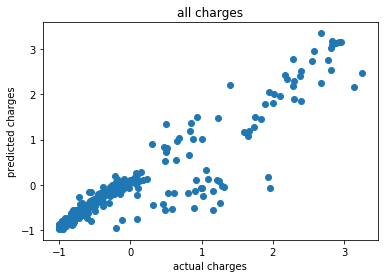

In [36]:
plt.scatter(testY, predictions)
plt.ylabel('predicted charges') 
plt.xlabel('actual charges') 
plt.title('all charges')

In [32]:
### Predict insurance costs for high charges ###

highTrain = pd.read_csv("../../data/sets/insurance_high_train.csv")
highTest = pd.read_csv("../../data/sets/insurance_high_test.csv")

highTrainX = highTrain.drop(columns = ["charges"])
highTrainY = highTrain["charges"]

highTestX = highTest.drop(columns = ["charges"])
highTestY = highTest["charges"]

randomSearch = RandomizedSearchCV(
    estimator = model, 
    param_distributions = params, 
    n_iter = 200, 
    random_state = 0
)

randomSearch.fit(highTrainX, highTrainY)
predictions = randomSearch.predict(highTestX)

print("Best Training Score: " + str(randomSearch.best_score_))
print("Best Params: " + str(randomSearch.best_params_))
print("R2 score: " + str(r2_score(highTestY, predictions)))
print("MSE: " + str(mean_squared_error(highTestY, predictions)))


Best Training Score: 0.7222983102793522
Best Params: {'alpha': 0.0005, 'learning_rate': 'constant', 'hidden_layer_sizes': (1,), 'activation': 'tanh', 'solver': 'lbfgs'}
R2 score: 0.7495435033294482
MSE: 0.2117267708826044


C:\Users\Ester\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5,1,'high cost charges')

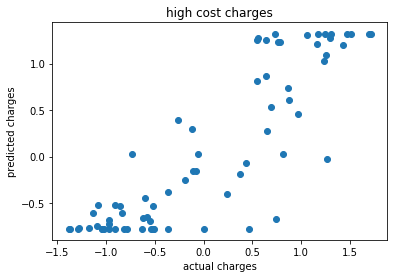

In [33]:
plt.scatter(highTestY, predictions)
plt.ylabel('predicted charges') 
plt.xlabel('actual charges') 
plt.title('high cost charges')

In [34]:
### Predict insurance costs for low-to-medium charges ###

lowTrain = pd.read_csv("../../data/sets/insurance_low_train.csv")
lowTest = pd.read_csv("../../data/sets/insurance_low_test.csv")

lowTrainX = lowTrain.drop(columns = ["charges"])
lowTrainY = lowTrain["charges"]

lowTestX = lowTest.drop(columns = ["charges"])
lowTestY = lowTest["charges"]

randomSearch = RandomizedSearchCV(
    estimator = model, 
    param_distributions = params, 
    n_iter = 200, 
    random_state = 0
)

randomSearch.fit(lowTrainX, lowTrainY)
predictions = randomSearch.predict(lowTestX)

print("Best Training Score: " + str(randomSearch.best_score_))
print("Best Params: " + str(randomSearch.best_params_))
print("R2 score: " + str(r2_score(lowTestY, predictions)))
print("MSE: " + str(mean_squared_error(lowTestY, predictions)))

Best Training Score: 0.9080329294312292
Best Params: {'alpha': 0.0005, 'learning_rate': 'constant', 'hidden_layer_sizes': (1,), 'activation': 'tanh', 'solver': 'lbfgs'}
R2 score: 0.8893147661424958
MSE: 0.11791213900396369


Text(0.5,1,'low-to-medium cost charges')

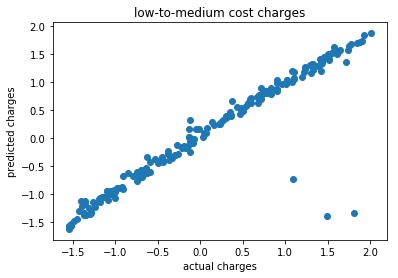

In [14]:
plt.scatter(lowTestY, predictions)
plt.ylabel('predicted charges') 
plt.xlabel('actual charges') 
plt.title('low-to-medium cost charges')